In [1]:
import numpy as np
from matplotlib.pyplot import imshow, figure
from matplotlib.pyplot import plot
from matplotlib.pyplot import show

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})


np.seterr(all='raise')
np.seterr()

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [12]:
def conv(kernel, img):
    size = kernel.shape[0]
    
    pixel = lambda local, kernel: (local * kernel).sum()
    get_local = lambda image, i, j: image[i:i+size, j:j+size]
    
    result = np.zeros_like(img)[size-1:, size-1:]
    for i in range(0, result.shape[0]):
        for j in range(0, result.shape[1]):
            p =  pixel(get_local(img, i, j), kernel)
            result[i,j] = p
    return result

def dot(M, x):
    return M @ x

In [3]:
def sqr(v):
    s = int(np.sqrt(v.shape[0] * v.shape[1]))
    return v.reshape((s,s))

def vec(m):
    return m.reshape(-1,1)

# this part is perhaps easier to understand 
# if you derive it yourself rather than read my solution
def fst_non_zero(x):
    assert x.shape[1] == 1
    j = 0
    for row in x:
        if row[0] != 0:
            return j
        j +=1
        
def row(x, summ):
    r =  np.zeros((1, x.shape[0]))
    j = fst_non_zero(x)
    r[0][j] = summ / x[j]
    return r

In [4]:
# matrix for a dot product equivalent to convlution with input imput sq(x) and output sq(y)
def matrix(x, y):
    return np.array([row(x,yy)[0] for yy in y])
# the other way around
def kernel(x, y):
    s = sqr(x)
    z = sqr(y)
    lambdas = []
    for i in range(24):
        for j in range(24):
            lambdas.append(get_local(s, i, j).reshape(1,-1)[0])
    lambdas = np.array(lambdas)
    K = sqr(np.linalg.lstsq(lambdas, y ,rcond=None)[0])
    return K

# DATA

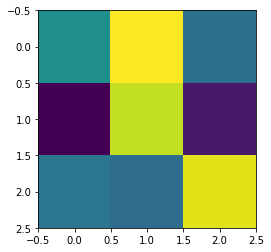

In [5]:
x = np.random.uniform(-2, 2, (3,3))
imshow(x)

i = lambda: np.random.uniform(-2, 2,  (3,3))

In [6]:
! pwd

/home/const/go/src/website/numpy_mnist/solving_MNIST


In [7]:
def o(inpt):
    
    white = np.array([[1],
                      [0]])

    black = np.array([[0],
                      [1]])
    
    if inpt.sum() > 0:
        return white
    else:
        return black

In [8]:
data = [(inpt := i(), o(inpt)) for _ in range(4)] 

# FORWARD PASS

In [9]:
kernels = np.array([np.ones((2,2))]*2)

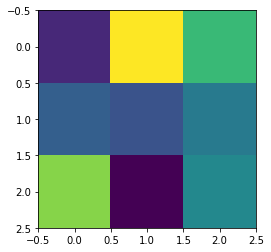

In [13]:
x = data[0][0]
imshow(x)

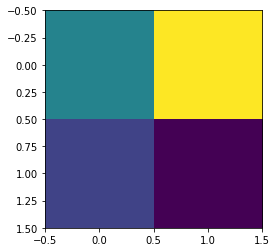

In [14]:
imshow(conv(kernels[0], x))

In [17]:
[vec(conv(k, x)) for k in kernels]

[array([[0.26],
        [2.47],
        [-0.73],
        [-1.53]]),
 array([[0.26],
        [2.47],
        [-0.73],
        [-1.53]])]

In [21]:
c = np.concatenate([vec(conv(k, x)) for k in kernels])

In [19]:
W = np.random.uniform(-1,1, (2, 8))

In [25]:
l = W@c
l

array([[-0.08],
       [1.49]])

In [23]:
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

In [26]:
pred = softmax(l)

array([[0.17],
       [0.83]])